In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pointbiserialr
import statsmodels.api as sm
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df = sns.load_dataset("titanic")
from sklearn.preprocessing import StandardScaler

In [2]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Column name descriptions 

| Column Name | English Description | German Description |
|-------------|---------------------|--------------------|
| survived    | Survival status (0 = No, 1 = Yes) | Überlebensstatus (0 = Nein, 1 = Ja) |
| pclass      | Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd) | Ticketklasse (1 = 1. Klasse, 2 = 2. Klasse, 3 = 3. Klasse) |
| sex         | Gender of the passenger | Geschlecht des Passagiers |
| age         | Age of the passenger | Alter des Passagiers |
| sibsp       | Number of siblings/spouses aboard | Anzahl der Geschwister/Ehepartner an Bord |
| parch       | Number of parents/children aboard | Anzahl der Eltern/Kinder an Bord |
| fare        | Passenger fare | Fahrpreis des Passagiers |
| embarked    | Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton) | Einschiffungshafen (C = Cherbourg, Q = Queenstown, S = Southampton) |
| class       | Ticket class (1st, 2nd, 3rd) | Ticketklasse (1. Klasse, 2. Klasse, 3. Klasse) |
| who         | Person's category (man, woman) | Personen-Kategorie (Mann, Frau) |
| adult_male  | Adult male indicator (True/False) | Erwachsener männlich (Ja/Nein) |
| deck        | Cabin deck | Kabinen-Deck |
| embark_town | Port of Embarkation (Cherbourg, Queenstown, Southampton) | Einschiffungshafen (Cherbourg, Queenstown, Southampton) |
| alive       | Survival status (yes, no) | Überlebensstatus (ja, nein) |
| alone       | Alone indicator (True/False) | Alleinreisend (Ja/Nein) |
ampton) |
n."

In [3]:
def check_df(dataframe, head=3):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Duplicate Values #####################")
    print(dataframe.duplicated().sum())
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))

    print("##################### NA #####################")
    print(dataframe.isna().mean()*100)

    print("##################### Unique Values #####################")
    print(dataframe.nunique())


In [4]:
check_df(df)

##################### Shape #####################
(891, 15)
##################### Duplicate Values #####################
107
##################### Types #####################
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object
##################### Head #####################
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    n

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [6]:
#df=df.dropna()

## Categorical Variables Analysis 

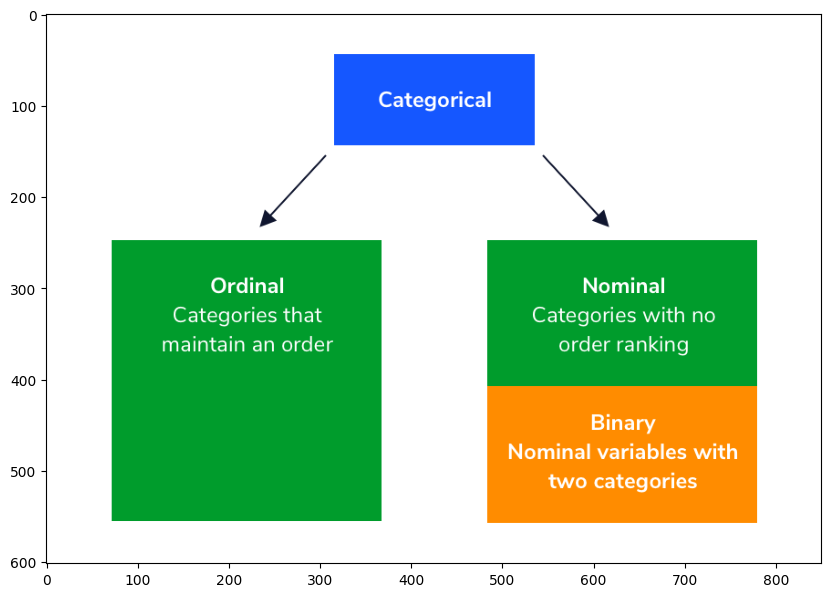

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread('documents/Intro_to_variable_types_3.webp')
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.show()

## English
**Categorical Variables**
Categorical variables are types of data that are divided into groups or categories.

**Nominal Variables**
- These are variables that have two or more categories without any intrinsic order.
- Examples include a person's gender (male, female, other), nationality (American, British, French), or brand of a product (Apple, Samsung, Google).
  
**Ordinal Variables**
- These are categorical variables that have a clear ordered relationship between categories.
- For example, an ordinal variable could be a customer satisfaction rating with categories like "Very Unsatisfied," "Unsatisfied," "Neutral," "Satisfied," and "Very Satisfied," where each category has a clear rank order.
## Deutsch
**Kategoriale Variablen**
Kategoriale Variablen sind Datentypen, die in Gruppen oder Kategorien eingeteilt sind.

**Nominale Variablen**
- Dies sind Variablen mit zwei oder mehr Kategorien, ohne eine inhärente Ordnung.
- Beispiele sind das Geschlecht einer Person (männlich, weiblich, divers), die Nationalität (amerikanisch, britisch, französisch) oder die Marke eines Produktes (Apple, Samsung, Google).
  
**Ordinale Variablen**
- Dies sind kategoriale Variablen mit einer klaren geordneten Beziehung zwischen den Kategorien.
- Zum Beispiel könnte eine ordinale Variable eine Kundenzufriedenheitsbewertung sein mit Kategorien wie "Sehr unzufrieden," "Unzufrieden," "Neutral," "Zufrieden," und "Sehr zufrieden," wobei jede Kategorie eine klare Rangordnung hat.

### Finding categorical_columns

In [8]:

def find_categorical_columns(df, max_unique_values=10, include_mixed_types=True):
    categorical_cols = []
    for col in df.columns:
        dtype = str(df[col].dtypes)       
        if dtype in ["category", "object", "bool"]:
            categorical_cols.append(col)
        elif include_mixed_types and pd.api.types.is_object_dtype(df[col]):
            categorical_cols.append(col)
        else:
            num_unique_values = df[col].nunique(dropna=False)
            if num_unique_values <= max_unique_values:
                categorical_cols.append(col)

    return categorical_cols

categorical_columns = find_categorical_columns(df)


In [9]:
categorical_columns

['survived',
 'pclass',
 'sex',
 'sibsp',
 'parch',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

In [10]:
def find_binary_columns(df, max_unique_values=2):
    binary_cols = []
    for col in df.columns:
        num_unique_values = df[col].nunique(dropna=False)
        if num_unique_values <= max_unique_values:
            binary_cols.append(col)
    return binary_cols

In [11]:
binary_columns=find_binary_columns(df)
binary_columns

['survived', 'sex', 'adult_male', 'alive', 'alone']

In [12]:
categorical_columns_set = set(df[categorical_columns].columns)
binary_value_set = set(binary_columns)
non_binary_columns = list(categorical_columns_set - binary_value_set)
non_binary_columns

['parch', 'embark_town', 'sibsp', 'who', 'pclass', 'deck', 'class', 'embarked']

### Finding numeric_columns

In [13]:
numerical_columns = [col for col in df.columns if df[col].dtypes in ["int","float" , 'int64']]
numerical_columns = [col for col in numerical_columns if col not in categorical_columns]


In [14]:
numerical_columns

['age', 'fare']

In [15]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Filling missing values based on correlation.

In [16]:
df.isna().mean()*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

### English:
- We have missing values in age, embarked, and deck.
### German:
- Wir haben fehlende Werte im Alter, beim Einsteigen und auf dem Deck.

In [17]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### English:
- First, before finding the correlation, we need to convert categorical columns to numerical values.
### German:
- Zuerst müssen wir vor dem Auffinden der Korrelation kategoriale Spalten in numerische Werte umwandeln.


In [18]:
for i in categorical_columns:
    if i != 'deck': 
        df[i] = le.fit_transform(df[i])



In [19]:
df['deck_encoded'] = le.fit_transform(df['deck'])
unique_decks = df['deck'].unique()
unique_deck_encoded = le.transform(unique_decks)
deck_pairs = list(zip(unique_decks, unique_deck_encoded))

In [20]:
df.drop("deck", axis=1,inplace=True)
df.rename(columns={"deck_encoded":"deck"},inplace=True)

# Time For Partice  Part 1 

## Correlation 

<div class="alert alert-danger">
 # Please be careful by using Person Correlation.
</dvi
on

### English:
- Pearson Correlation Coefficient: Pearson's correlation measures the linear relationship between two continuous variables. It assumes that both variables are normally distributed and have a linear relationship.
- Kendall Tau Correlation Coefficient: Kendall's tau is a non-parametric measure that assesses the ordinal association between two variables.
- Spearman Rank Correlation: Spearman's correlation is another non-parametric measure. It does not assume normal distribution.
- Chi-square test for categorical variables, but it treats ordinal data as nominal (this is a limitation).
### German:
- Pearson-Korrelationskoeffizient: Die Pearson-Korrelation misst die lineare Beziehung zwischen zwei kontinuierlichen Variablen. Sie setzt voraus, dass beide Variablen normal verteilt sind und eine lineare Beziehung haben.
- Kendall Tau Korrelationskoeffizient: Kendall's Tau ist ein nicht-parametrisches Maß, das die ordinale Assoziation zwischen zwei Variablen bewertet.
- Spearman Rank Korrelation: Die Spearman-Korrelation ist ein weiteres nicht-parametrisches Maß. Es setzt keine Normalverteilung voraus.
- Chi-Quadrat-Test für kategoriale Variablen, behandelt jedoch ordinale Daten als nominal (dies ist eine Einschränkung).


In [21]:
ordinal_columns=['pclass' , 'sibsp']

### English:
As "pclass" and "sibsp" can be considered as ordinal categorical datasets, we can use Spearman correlation for those columns.
### German:
Da "pclass" und "sibsp" als ordinal-kategoriale Datensätze betrachtet werden können, können wir für diese Spalten die Spearman-Korrelation verwenden.

In [22]:
method : {'pearson', 'kendall', 'spearman'}

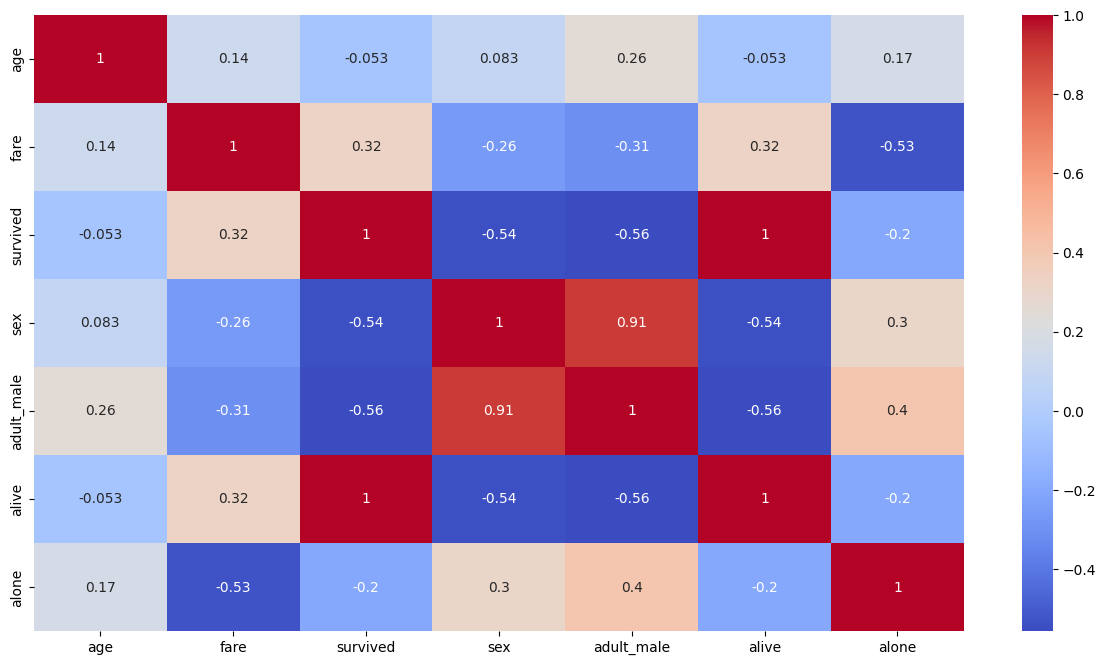

In [23]:
plt.figure(figsize=(15, 8))  
correlation_matrix = df[numerical_columns+binary_columns].corr(method='spearman')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

## The Cramér's V statistic correation amoung categorical(Non -Binary columns) variables

In [24]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_v(x, y):
    """Calculate Cramér's V statistic for two categorical variables."""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((rcorr-1), (kcorr-1)))


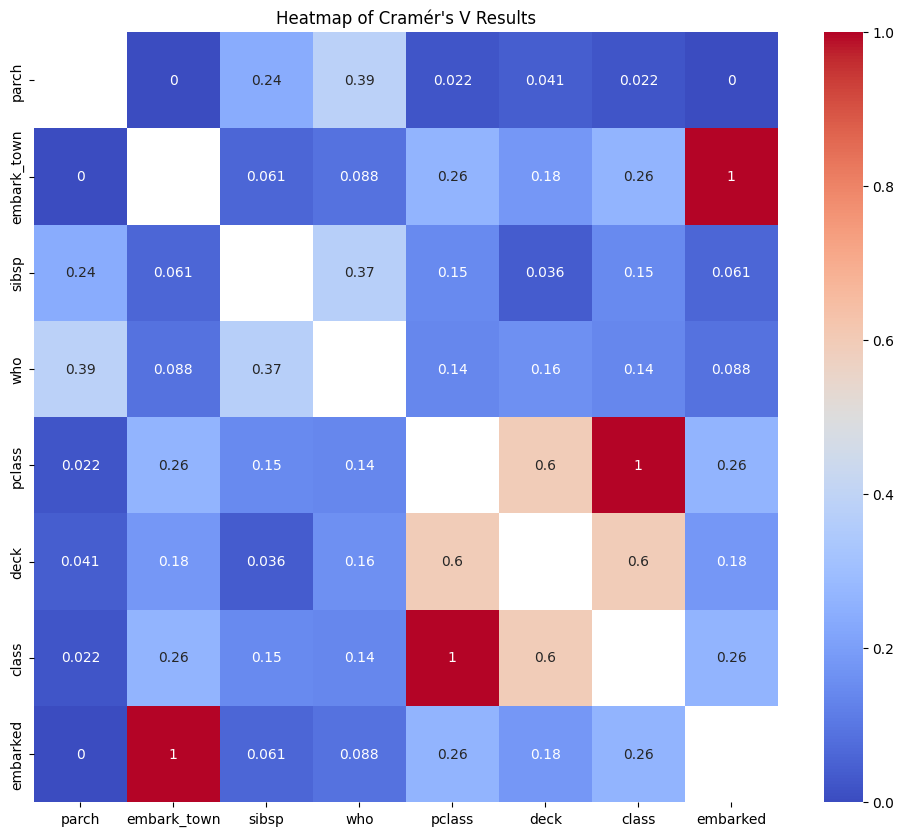

In [25]:
cramers_v_results = pd.DataFrame(index=non_binary_columns, columns=non_binary_columns)

for col1 in non_binary_columns:
    for col2 in non_binary_columns:
        if col1 != col2:
            cramers_v_results.loc[col1, col2] = cramers_v(df[col1], df[col2])

cramers_v_results
plt.figure(figsize=(12, 10))
sns.heatmap(cramers_v_results.astype(float), annot=True, cmap='coolwarm')
plt.title("Heatmap of Cramér's V Results")
plt.show()

 ## Visualizing the relationship between a categorical variable and  numerical columns 

In [26]:
from ipywidgets import interact, Dropdown, FloatSlider, HBox
import plotly.graph_objs as go
import pandas as pd
import plotly.subplots as sp

In [27]:
numerical_columns_sorted = sorted(numerical_columns)
categorical_columns_sorted = sorted(categorical_columns)
numerical_dropdown = Dropdown(options=numerical_columns_sorted, description='Numerical Column:')
categorical_dropdown = Dropdown(options=categorical_columns_sorted, description='Categorical Column:')

In [28]:

def update_plot(numerical_column, categorical_column):
    data = []
    categories = df[categorical_column].unique().tolist()
    if pd.isna(categories).any():
        categories.append(np.nan)
    for category in categories:
        if pd.isna(category):
            category_name = 'missing'  
            subset = df[pd.isna(df[categorical_column])][numerical_column]
        else:
            category_name = str(category)
            subset = df[df[categorical_column] == category][numerical_column]

        data.append(
            go.Box(
                y=subset,
                name=category_name
            )
        )
    fig = go.Figure(data=data)
    fig.update_layout(title=f'Distribution of {numerical_column} by {categorical_column} (including Missing)')
    fig.show()
interact(update_plot, numerical_column=numerical_dropdown, categorical_column=categorical_dropdown)

interactive(children=(Dropdown(description='Numerical Column:', options=('age', 'fare'), value='age'), Dropdow…

<function __main__.update_plot(numerical_column, categorical_column)>

In [29]:
titanic_dataset = sns.load_dataset("titanic")

In [30]:
titanic_dataset.isna().mean()*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

We have some missing value , Let us fill them

## Filling Missing Values Based on Correlation.

In [31]:
titanic_dataset.groupby(['who'])['age'].median()

who
child     5.0
man      30.0
woman    30.0
Name: age, dtype: float64

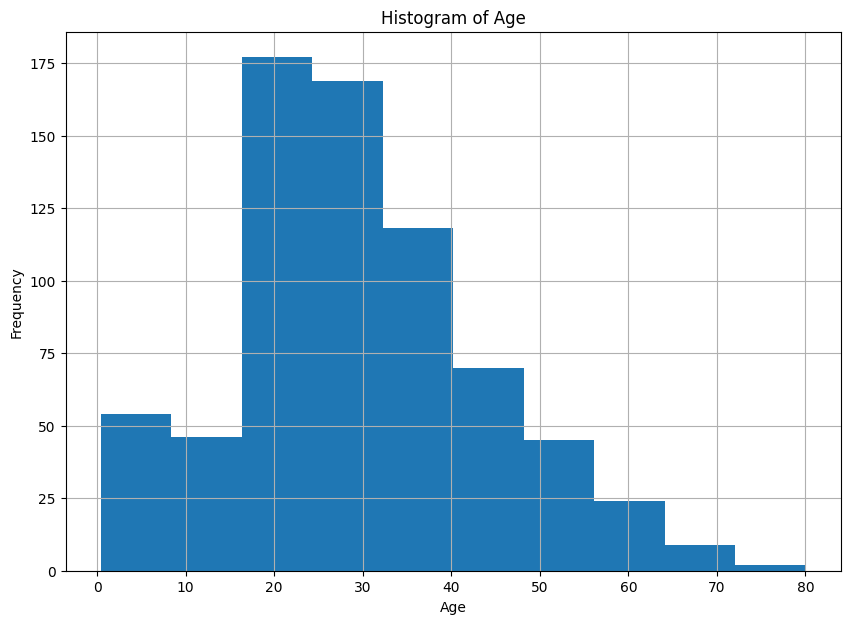

In [32]:
plt.figure(figsize=(10, 7))
titanic_dataset['age'].hist()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

In [33]:
print(f" The medina is {titanic_dataset['age']. median()}")
print(f" The mean is {titanic_dataset['age']. mean()}")

 The medina is 28.0
 The mean is 29.69911764705882


In [34]:

median_ages = titanic_dataset.groupby('who')['age'].median()
def fill_age(row):
    if pd.isnull(row['age']) and row['who'] in median_ages:
        return median_ages[row['who']]
    else:
        return row['age']
titanic_dataset['age'] = titanic_dataset.apply(fill_age, axis=1)


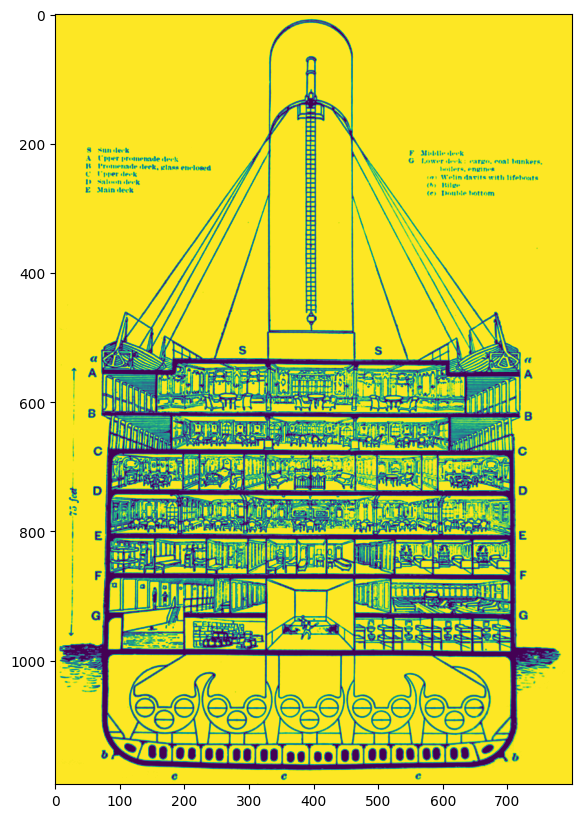

In [35]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread('Datasets/Olympic_&_Titanic_cutaway_diagram.png')
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.show()

In [36]:
deck_pairs

[(nan, 7),
 ('C', 2),
 ('E', 4),
 ('G', 6),
 ('D', 3),
 ('A', 0),
 ('B', 1),
 ('F', 5)]

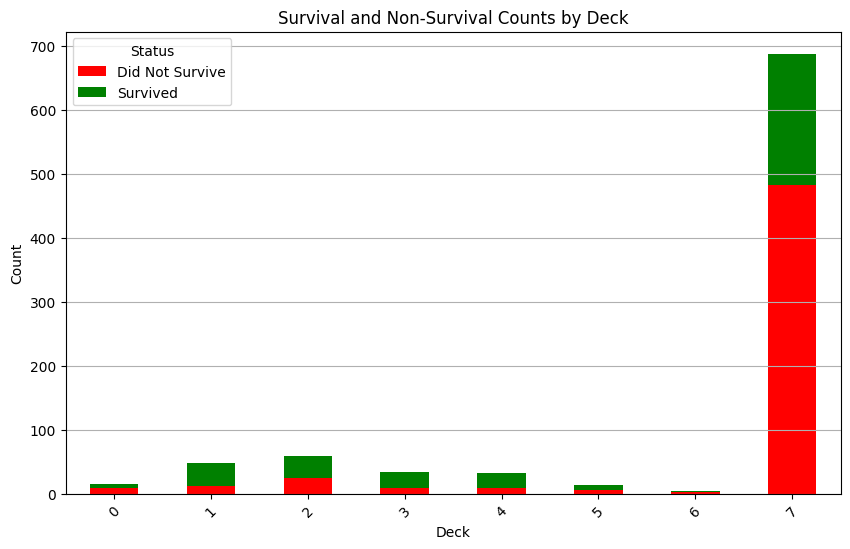

In [37]:
survival_counts = pd.crosstab(df['deck'], df['survived'])
survival_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['red', 'green'])
plt.title('Survival and Non-Survival Counts by Deck')
plt.xlabel('Deck')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate deck names for better readability
plt.legend(['Did Not Survive', 'Survived'], title='Status')
plt.grid(axis='y')
plt.show()

# Time for Pratice part 2

## Feature improvement

In [38]:
low_fare = titanic_dataset['fare'].quantile(0.33)
medium_fare = titanic_dataset['fare'].quantile(0.66)

# Apply categorization
for index, row in titanic_dataset.iterrows():
    if row['fare'] <= low_fare:
        titanic_dataset.at[index, 'fare_category'] = 'Low'
    elif row['fare'] <= medium_fare:
        titanic_dataset.at[index, 'fare_category'] = 'Medium'
    else:
        titanic_dataset.at[index, 'fare_category'] = 'High'

In [39]:
titanic_dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,fare_category
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Low
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,High
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Low
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,High
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Low


### Filling deck missing values 

In [40]:

def find_mode(group):
    if not group.empty:
        mode_result = group.mode()
        if not mode_result.empty:
            return mode_result.iloc[0]
    return None
mode_deck = titanic_dataset.groupby(['fare_category', 'embark_town' ,  "class" ])['deck'].apply(find_mode)

mode_deck.head()


fare_category  embark_town  class 
High           Cherbourg    First        B
                            Second    None
                            Third      NaN
               Queenstown   First        C
                            Second     NaN
Name: deck, dtype: object

In [41]:
def fill_deck_with_mode(group):
    mode_value = group['deck'].mode().iloc[0] if not group.empty and not group['deck'].mode().empty else "unknown"
    group['deck'] = group['deck'].cat.add_categories("unknown").fillna(mode_value)
    return group

titanic_dataset = titanic_dataset.groupby(["fare_category",'embark_town', 'class']).apply(fill_deck_with_mode).reset_index(drop=True)

C:\Users\habdullayev\AppData\Local\Temp\ipykernel_12868\2154985695.py:6: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



In [42]:
titanic_dataset['deck'].value_counts()

F          430
unknown    114
G          111
C           77
B           66
D           42
E           34
A           15
Name: deck, dtype: int64

In [43]:
titanic_dataset.isna().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck             0
embark_town      0
alive            0
alone            0
fare_category    0
dtype: int64

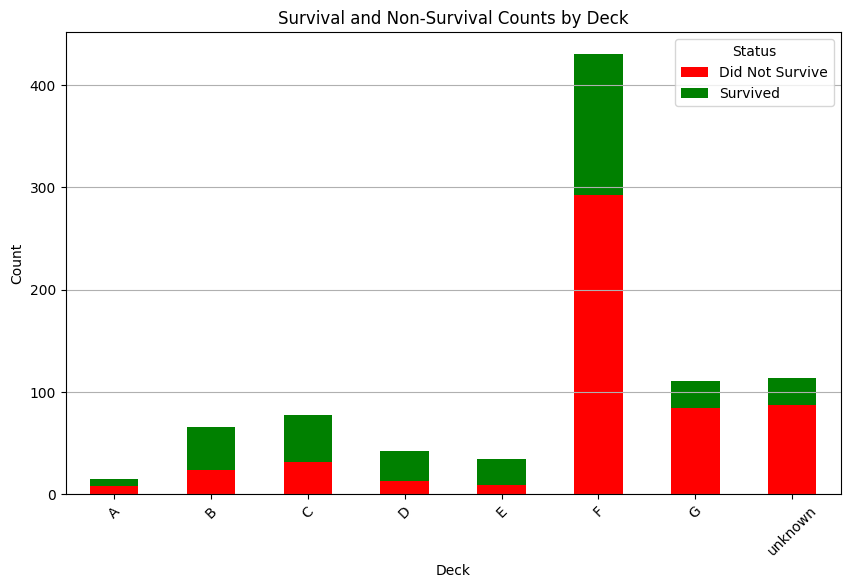

In [44]:
survival_counts = pd.crosstab(titanic_dataset['deck'], titanic_dataset['survived'])
survival_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['red', 'green'])
plt.title('Survival and Non-Survival Counts by Deck')
plt.xlabel('Deck')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate deck names for better readability
plt.legend(['Did Not Survive', 'Survived'], title='Status')
plt.grid(axis='y')
plt.show()

In [45]:
titanic_dataset.dropna(inplace=True)

We have just two missing values in embarked , which we can drop

# Time for partice part 3 

## Dropping High correlated columns

In [46]:
categorical_columns = find_categorical_columns(titanic_dataset)
categorical_columns

['survived',
 'pclass',
 'sex',
 'sibsp',
 'parch',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone',
 'fare_category']

In [47]:
binary_columns=find_binary_columns(titanic_dataset)
binary_columns

['survived', 'sex', 'adult_male', 'alive', 'alone']

In [48]:
categorical_columns_set = set(titanic_dataset[categorical_columns].columns)
binary_value_set = set(binary_columns)
non_binary_columns = list(categorical_columns_set - binary_value_set)
non_binary_columns

['parch',
 'embark_town',
 'sibsp',
 'who',
 'fare_category',
 'pclass',
 'deck',
 'class',
 'embarked']

In [49]:
numerical_columns = [col for col in df.columns if df[col].dtypes in ["int","float" , 'int64']]
numerical_columns = [col for col in numerical_columns if col not in categorical_columns]
numerical_columns

['age', 'fare']

In [50]:
for i in titanic_dataset[categorical_columns]:
    titanic_dataset[i] = le.fit_transform(titanic_dataset[i])

In [51]:
titanic_dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,fare_category
0,0,2,1,22.0,1,0,7.2500,2,2,1,1,5,2,0,0,1
1,1,0,0,38.0,1,0,71.2833,0,0,2,0,2,0,1,0,0
2,1,2,0,26.0,0,0,7.9250,2,2,2,0,5,2,1,1,1
3,1,0,0,35.0,1,0,53.1000,2,0,2,0,2,2,1,0,0
4,0,2,1,35.0,0,0,8.0500,2,2,1,1,5,2,0,1,1


### English:
As "pclass" and "sibsp" can be considered as ordinal categorical datasets, we can use Spearman correlation for those columns.
### German:
Da "pclass" und "sibsp" als ordinal-kategoriale Datensätze betrachtet werden können, können wir für diese Spalten die Spearman-Korrelation verwenden.


In [52]:
ordinal_columns=['pclass' , 'sibsp']

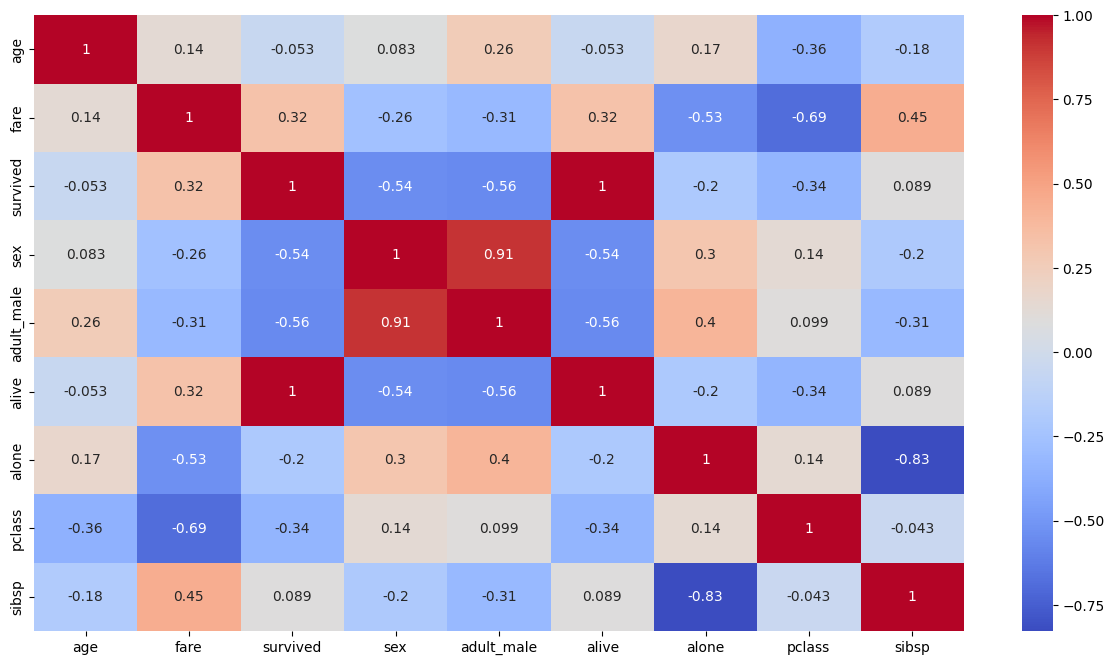

In [53]:
plt.figure(figsize=(15, 8))  
correlation_matrix = df[numerical_columns+binary_columns+ordinal_columns].corr(method='spearman')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

## Dropping highly correlated columns in both binary , continuous variables and ordinal_columns .

In [54]:
cor_matrix= df[numerical_columns+binary_columns].corr(method='spearman')
def high_correlated_cols(dataframe, plot=False, corr_th=0.90):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize': (15, 15)})
        sns.heatmap(corr, cmap="RdBu")
        plt.show()
    return drop_list

In [55]:
high_correlated_cols(titanic_dataset  )

['class', 'adult_male', 'embark_town', 'alive']

In [56]:
high_correlated_columns=high_correlated_cols(titanic_dataset  )
high_correlated_columns

['class', 'adult_male', 'embark_town', 'alive']

In [57]:
titanic_dataset = titanic_dataset.drop(high_correlated_columns, axis=1)


In [58]:
titanic_dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,deck,alone,fare_category
0,0,2,1,22.0,1,0,7.2500,2,1,5,0,1
1,1,0,0,38.0,1,0,71.2833,0,2,2,0,0
2,1,2,0,26.0,0,0,7.9250,2,2,5,1,1
3,1,0,0,35.0,1,0,53.1000,2,2,2,0,0
4,0,2,1,35.0,0,0,8.0500,2,1,5,1,1


In [59]:
titanic_dataset['parch'].value_counts()

0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

In [60]:
columns_to_encode= [ 'embarked' , 'who' , 'deck']

In [61]:
titanic_dataset_dummies = pd.get_dummies(titanic_dataset, columns=columns_to_encode).astype('int')

### English:
Leaving the ordinal categorical values in numerical order is not a problem because they retain their inherent order. However, the nominal values should be converted into dummy variables.
### German:
Es ist kein Problem, die ordinalen kategorialen Werte in numerischer Reihenfolge zu belassen, da sie ihre inhärente Reihenfolge beibehalten. Die nominalen Werte sollten jedoch in Dummy-Variablen umgewandelt werden.


In [62]:
titanic_dataset_dummies.head()

,survived,pclass,sex,age,sibsp,parch,fare,alone,fare_category,embarked_0,...,who_1,who_2,deck_0,deck_1,deck_2,deck_3,deck_4,deck_5,deck_6,deck_7
0,0,2,1,22,1,0,7,0,1,0,...,1,0,0,0,0,0,0,1,0,0
1,1,0,0,38,1,0,71,0,0,1,...,0,1,0,0,1,0,0,0,0,0
2,1,2,0,26,0,0,7,1,1,0,...,0,1,0,0,0,0,0,1,0,0
3,1,0,0,35,1,0,53,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,0,2,1,35,0,0,8,1,1,0,...,1,0,0,0,0,0,0,1,0,0


In [63]:
titanic_dataset_dummies.head()

,survived,pclass,sex,age,sibsp,parch,fare,alone,fare_category,embarked_0,...,who_1,who_2,deck_0,deck_1,deck_2,deck_3,deck_4,deck_5,deck_6,deck_7
0,0,2,1,22,1,0,7,0,1,0,...,1,0,0,0,0,0,0,1,0,0
1,1,0,0,38,1,0,71,0,0,1,...,0,1,0,0,1,0,0,0,0,0
2,1,2,0,26,0,0,7,1,1,0,...,0,1,0,0,0,0,0,1,0,0
3,1,0,0,35,1,0,53,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,0,2,1,35,0,0,8,1,1,0,...,1,0,0,0,0,0,0,1,0,0


In [64]:
titanic_dataset_dummies.to_csv('Datasets/clean_titanic.csv', index=False)


### English:
We save the clean dataset and will use it later.
### German:
Wir speichern den bereinigten Datensatz und werden ihn später verwenden.
